In [2]:
#Direct construction of QFT

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT

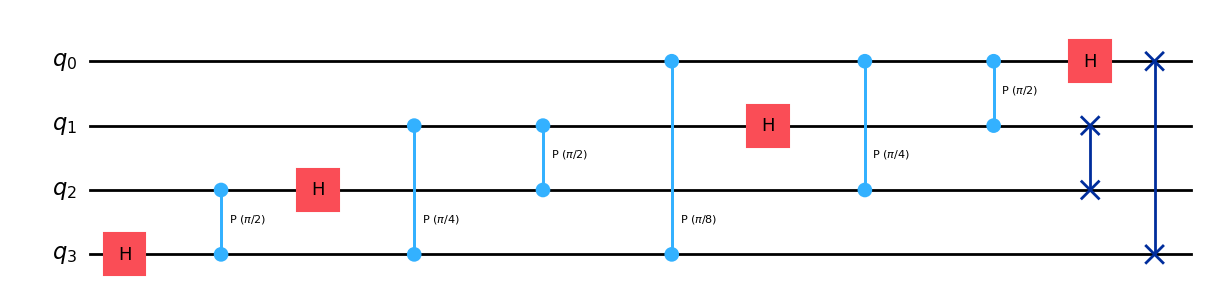

In [26]:
qft=QFT(4)
qft.decompose().draw('mpl')

In [51]:
#Cannot use plugin as we are unable to use measurements due to lack of classical registers

In [33]:
#Unitary circuit of QFT with swap

In [44]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from math import pi

def get_qft_circuit_static_swap(num_qubit):
    #Initialize the quantum circuit
    qr=QuantumRegister(num_qubit)
    cr3=ClassicalRegister(num_qubit,name="cr3")
    qc=QuantumCircuit(qr,cr3)
    
    # Apply the QFT
    for j in range(num_qubit):
        qc.h(j)
        for k in range(j + 1, num_qubit):
            qc.cp(pi / 2**(k - j), k, j)
    
    # Reverse the order of the qubits
    for i in range(num_qubit // 2):
        qc.swap(i, num_qubit - i - 1)

    #Final measurement
    for i in range(num_qubit):
        qc.measure(qr[i],cr3[i])
    
    return qc

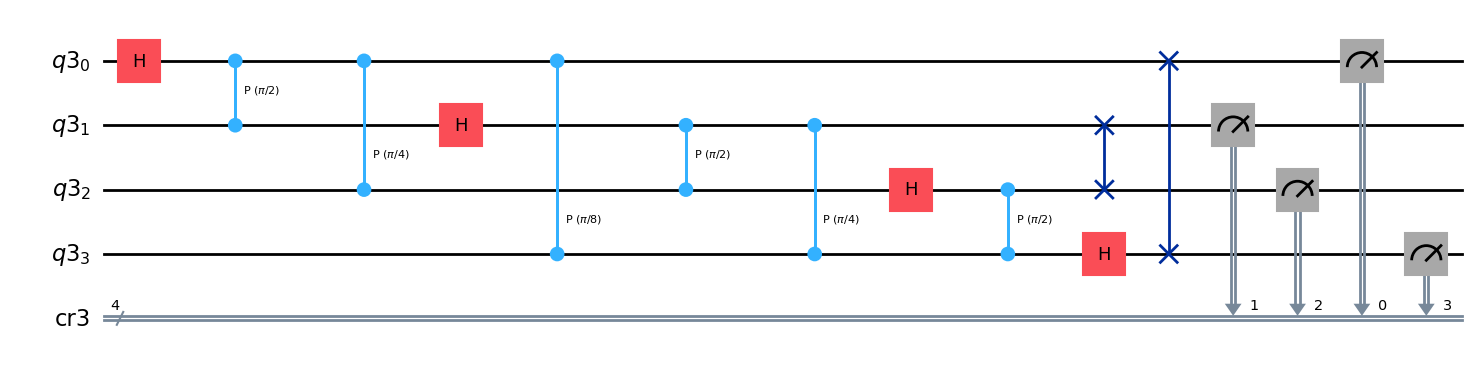

In [45]:
qc = get_qft_circuit_static_swap(num_qubit=4)
qc.draw('mpl')

In [46]:
#Unitary circuit of QFT without swap

In [49]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from math import pi

def get_qft_circuit_static_noswap(num_qubit):
    #Initialize the quantum circuit
    qr=QuantumRegister(num_qubit)
    cr3=ClassicalRegister(num_qubit,name="cr3")
    qc=QuantumCircuit(qr,cr3)
    
    # Apply the QFT
    for j in range(num_qubit):
        qc.h(j)
        for k in range(j + 1, num_qubit):
            qc.cp(pi / 2**(k - j), k, j)
    
    # Reverse the order of the qubits
    #for i in range(num_qubit // 2):
        #qc.swap(i, num_qubit - i - 1)

    qc.barrier()

    #Final measurement
    for i in range(num_qubit):
        qc.measure(qr[i],cr3[i])
    
    return qc

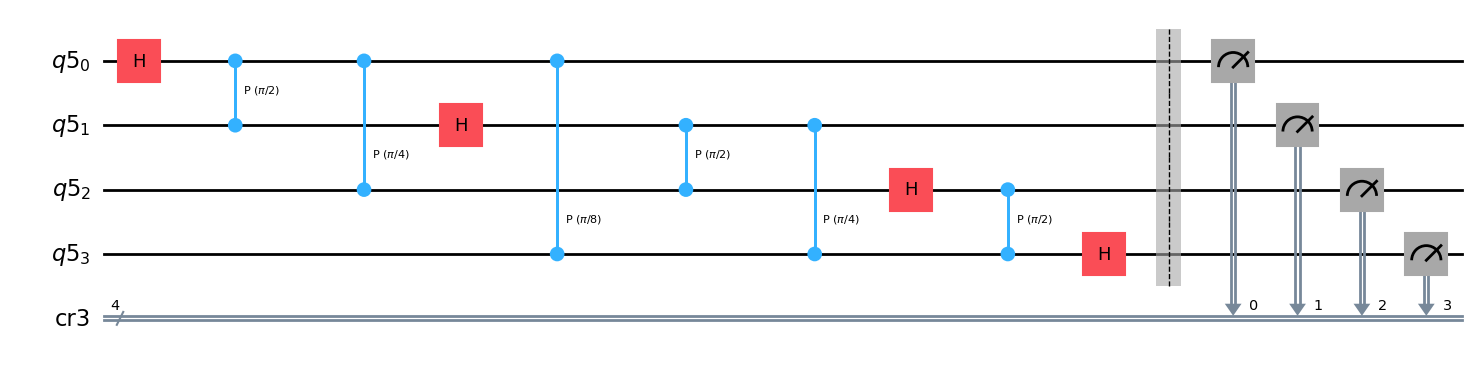

In [50]:
qc = get_qft_circuit_static_noswap(num_qubit=4)
qc.draw('mpl')

In [52]:
#Plugin on QFT with swap

In [54]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_qft_circuit_dynamic_plugin_swap(num_qubit):
    qc=get_qft_circuit_static_swap(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, init_method="qubit_reuse")
    transpiled_qc = pm.run(qc)
    return transpiled_qc

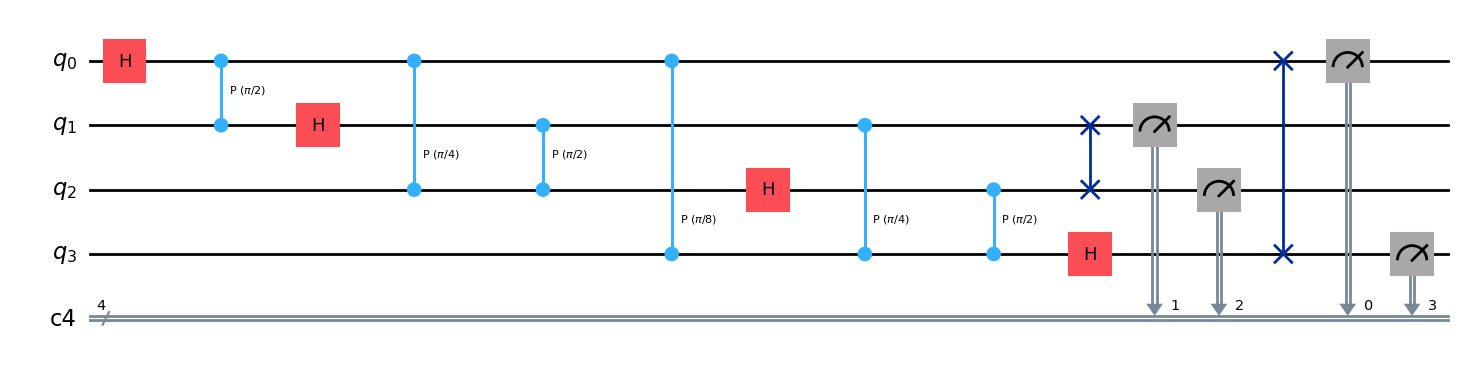

In [57]:
qc = get_qft_circuit_dynamic_plugin_swap(num_qubit=4)
qc.draw("mpl")

In [58]:
#Plugin on QFT without swap

In [63]:
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_qft_circuit_dynamic_plugin_noswap(num_qubit):
    qc=get_qft_circuit_static_noswap(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, init_method="qubit_reuse")
    transpiled_qc = pm.run(qc)
    return transpiled_qc

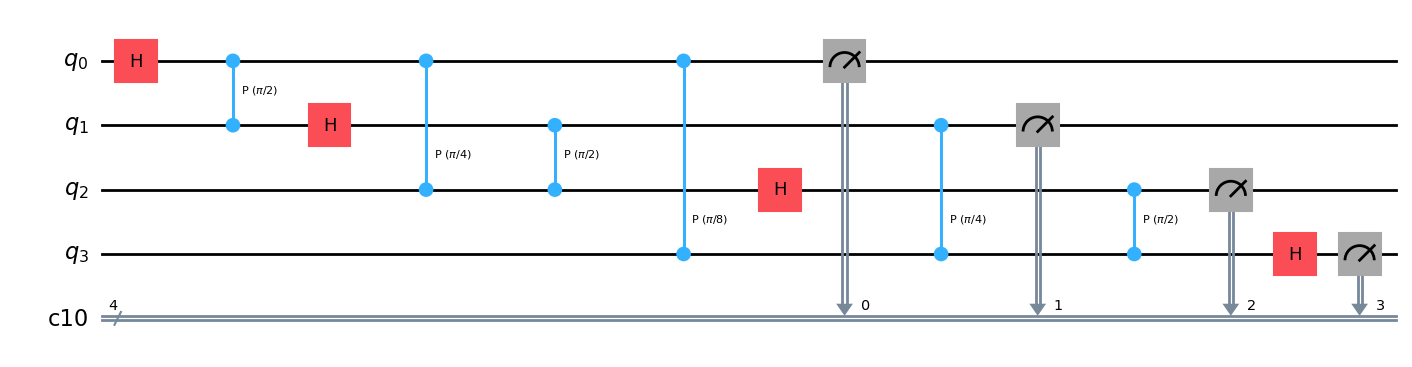

In [64]:
qc = get_qft_circuit_dynamic_plugin_noswap(num_qubit=4)
qc.draw("mpl")